In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('Iris.csv')
print('Data loaded successfully')
df.head(3)

Data loaded successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


<h1>EDA</h1>

In [18]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}
df['Species'] = df['Species'].map(species)


In [20]:
df['Species'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values
X.shape, y.shape

((150, 4), (150,))

C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


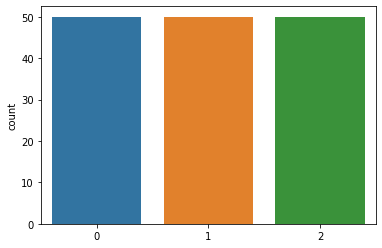

Data is completely balanced


In [24]:
sns.countplot(y)
plt.show()
print('Data is completely balanced')

<h1>Splitting our Data</h1>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h1>Decision Tree Classifier</h1>

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)
predict = model.predict(X_test)
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

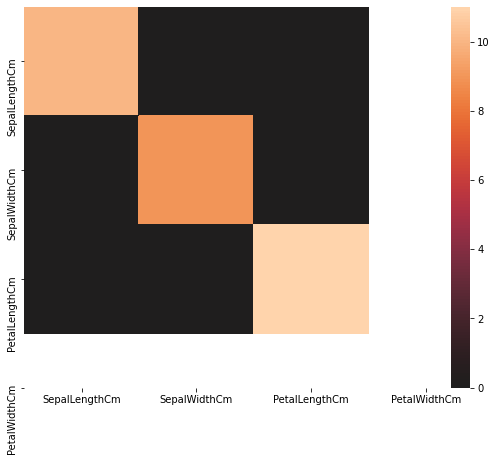

In [31]:
from sklearn import metrics
plt.figure(figsize = (9,7))
sns.heatmap(metrics.confusion_matrix(y_test, predict), xticklabels = df.iloc[:, 1:5].columns.values,  yticklabels = df.iloc[:, 1:5].columns.values, center = 0)
plt.show()

In [32]:
print(f"Precision: {metrics.precision_score(y_test, predict, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, predict, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, predict, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


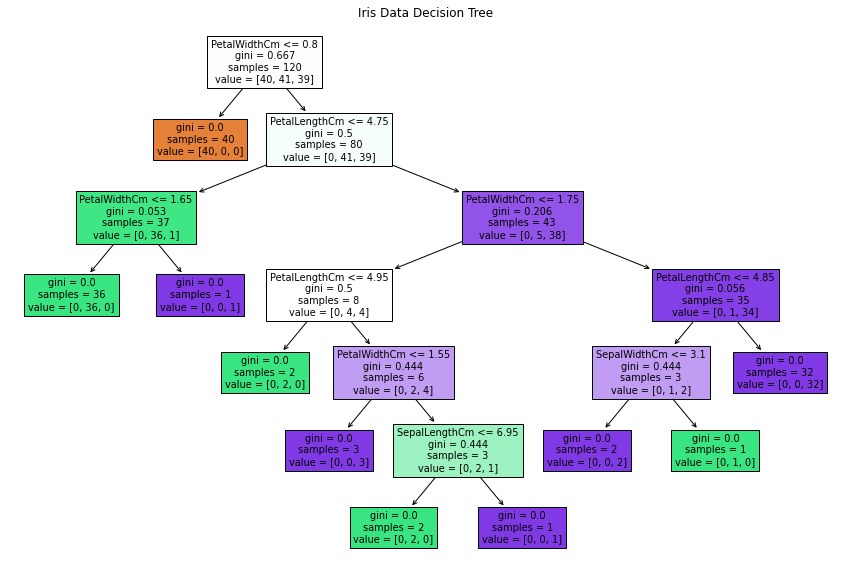

In [33]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = df.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()